In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from pprint import pprint 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
import pandas as pd

In [2]:
iris = datasets.load_iris()
y_data = iris.target
x_data = iris.data

In [60]:
pipeline_A = make_pipeline(StandardScaler(), PCA(), LogisticRegression(solver="lbfgs",multi_class="auto"))

In [61]:
pipeline_A.fit(x_data, y_data)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [62]:
y_pred = pipeline_A.predict(iris.data)

In [63]:
f1_score(y_data, y_pred, average='micro')  

0.9733333333333334

In [64]:
print(pipeline_A.steps)

[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False))]


In [137]:
param_grid = {'logisticregression__l1_ratio':[0.1,0.2,0.3,0.4,0.5], 
                  'logisticregression__solver':['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'],
                  #pca__n_components=[1,2,3,4]
             }

In [138]:
clf = GridSearchCV(pipeline_A, param_grid, cv=5)

In [67]:
clf.fit(iris.data, iris.target)
print(clf.cv_results_)

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\Administrator\AppData\Roaming\Pytho

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\Administrator\AppData\Roaming\Pytho

{'mean_fit_time': array([0.01060739, 0.00660462, 0.00220146, 0.00320168, 0.0018012 ,
       0.0104075 , 0.0072042 , 0.00200129, 0.00300183, 0.00160112,
       0.01020699, 0.00700483, 0.00420322, 0.00520306, 0.00180154,
       0.0158113 , 0.00960627, 0.00320182, 0.00360203, 0.00140109,
       0.01020684, 0.00660439, 0.00220146, 0.00300155, 0.0014008 ]), 'std_fit_time': array([4.90681506e-04, 4.90135123e-04, 4.00352506e-04, 4.00328647e-04,
       4.00161743e-04, 8.00824256e-04, 3.99756812e-04, 2.61174468e-07,
       1.90734863e-07, 4.90193390e-04, 7.48761531e-04, 1.09667164e-03,
       4.00472010e-04, 1.60097523e-03, 4.00212452e-04, 2.48260422e-03,
       2.24749540e-03, 7.48813216e-04, 4.90076613e-04, 4.90251878e-04,
       4.00471698e-04, 4.90427108e-04, 4.00114329e-04, 3.23406696e-07,
       4.89998861e-04]), 'mean_score_time': array([0.00040045, 0.00040026, 0.00020018, 0.        , 0.00020013,
       0.00020027, 0.0004005 , 0.0004003 , 0.00080075, 0.0004003 ,
       0.00020022, 0.0002

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\Administrator\AppData\Roaming\Pytho

In [68]:
print("NUM RUNS: "+str(len(clf.cv_results_['params'])))
pprint(clf.cv_results_['params'])
print(clf.cv_results_['mean_test_score'])

NUM RUNS: 25
[{'logisticregression__l1_ratio': 0.1,
  'logisticregression__solver': 'newton-cg'},
 {'logisticregression__l1_ratio': 0.1, 'logisticregression__solver': 'lbfgs'},
 {'logisticregression__l1_ratio': 0.1, 'logisticregression__solver': 'sag'},
 {'logisticregression__l1_ratio': 0.1, 'logisticregression__solver': 'saga'},
 {'logisticregression__l1_ratio': 0.1,
  'logisticregression__solver': 'liblinear'},
 {'logisticregression__l1_ratio': 0.2,
  'logisticregression__solver': 'newton-cg'},
 {'logisticregression__l1_ratio': 0.2, 'logisticregression__solver': 'lbfgs'},
 {'logisticregression__l1_ratio': 0.2, 'logisticregression__solver': 'sag'},
 {'logisticregression__l1_ratio': 0.2, 'logisticregression__solver': 'saga'},
 {'logisticregression__l1_ratio': 0.2,
  'logisticregression__solver': 'liblinear'},
 {'logisticregression__l1_ratio': 0.3,
  'logisticregression__solver': 'newton-cg'},
 {'logisticregression__l1_ratio': 0.3, 'logisticregression__solver': 'lbfgs'},
 {'logisticregr

## Organize the factors

In [69]:
factors = clf.cv_results_['params']
factors = pd.DataFrame(factors)
results = clf.cv_results_['mean_test_score']

In [70]:
factors

,logisticregression__l1_ratio,logisticregression__solver
0,0.1,newton-cg
1,0.1,lbfgs
2,0.1,sag
3,0.1,saga
4,0.1,liblinear
5,0.2,newton-cg
6,0.2,lbfgs
7,0.2,sag
8,0.2,saga
9,0.2,liblinear


In [71]:
text_levels = factors['logisticregression__solver'].unique()
zipped_dicts = dict(zip(text_levels, range(len(text_levels))))
print(zipped_dicts)

factors=factors.replace(zipped_dicts)


{'newton-cg': 0, 'lbfgs': 1, 'sag': 2, 'saga': 3, 'liblinear': 4}


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

KeyError: 'pca__n_components'

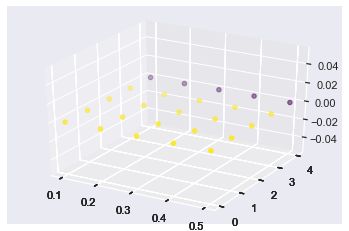

In [72]:
#%matplotlib inline 
%matplotlib widget
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

#ax.scatter(factors['logisticregression__l1_ratio'], factors['logisticregression__solver'], results)
#ax.scatter(factors['logisticregression__l1_ratio'], factors['logisticregression__solver'], factors['pca__n_components'],c=results, cmap='viridis')
ax.scatter(factors['logisticregression__l1_ratio'], factors['logisticregression__solver'],c=results, cmap='viridis')

#ax.bar3d(factors['logisticregression__l1_ratio'], factors['logisticregression__solver'], results)
#plt.yticks(factors['logisticregression__solver'], list(zipped_dicts.keys()))
#plt.yticks(factors['logisticregression__solver'])
plt.yticks(factors['logisticregression__solver'])
plt.yticks(factors['logisticregression__solver'])
plt.xticks(factors['logisticregression__l1_ratio'])
ax.set_zticks(factors['pca__n_components'])

#pos = ax.imshow(cmap='Blues', interpolation='none')
#fig.colorbar(pos,ax=ax)
PCM=ax.get_children()[0]
plt.colorbar(PCM, ax=ax)
#plt.yticks(factors['logisticregression__solver'], list(zipped_dicts.keys()))

plt.show()

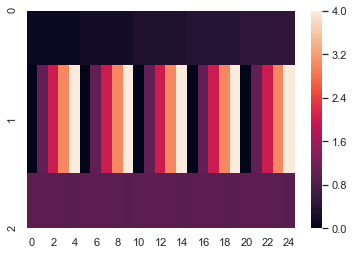

In [79]:
%matplotlib inline 
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
uniform_data = np.random.rand(10, 12)
ax = plt.axes()
ax = sns.heatmap((factors['logisticregression__l1_ratio'],factors['logisticregression__solver'],results))

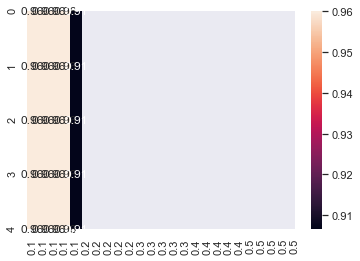

In [105]:
res = np.array(results)
res=res.reshape(len(factors['logisticregression__l1_ratio'].unique()), len(factors['logisticregression__solver'].unique()))
plt.figure()
ax = sns.heatmap(res,annot=True,xticklabels=factors['logisticregression__l1_ratio'])


In [115]:
factors['res']=results

In [107]:
res.shape

(5, 5)

In [108]:
res = np.array(results).reshape(5,5)

In [109]:
print(res)

[[0.96       0.96       0.96       0.96       0.90666667]
 [0.96       0.96       0.96       0.96       0.90666667]
 [0.96       0.96       0.96       0.96       0.90666667]
 [0.96       0.96       0.96       0.96       0.90666667]
 [0.96       0.96       0.96       0.96       0.90666667]]


logisticregression__solver       0     1     2     3         4
logisticregression__l1_ratio                                  
0.1                           0.96  0.96  0.96  0.96  0.906667
0.2                           0.96  0.96  0.96  0.96  0.906667
0.3                           0.96  0.96  0.96  0.96  0.906667
0.4                           0.96  0.96  0.96  0.96  0.906667
0.5                           0.96  0.96  0.96  0.96  0.906667


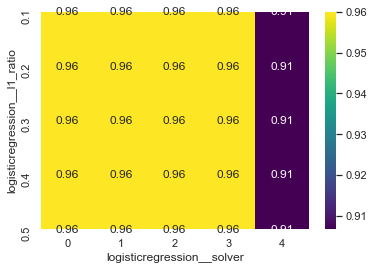

In [121]:
factors_pivoted = factors.pivot("logisticregression__l1_ratio", "logisticregression__solver", "res")
print(factors_pivoted)
ax = sns.heatmap(factors_pivoted,annot=True,cmap='viridis')


# Formalize

In [185]:
from sklearn.model_selection import ParameterGrid

#specify data
iris = datasets.load_iris()
y_data = iris.target
x_data = iris.data

In [186]:
#specify pipeline
pipeline_A = make_pipeline(StandardScaler(), PCA(), LogisticRegression(solver="lbfgs",multi_class="auto"))




In [187]:
param_grid = ParameterGrid({'logisticregression__l1_ratio': [0.1,0.2,0.3,0.4,0.5], 
                            'logisticregression__solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear']})
pprint(list(param_grid))

[{'logisticregression__l1_ratio': 0.1,
  'logisticregression__solver': 'newton-cg'},
 {'logisticregression__l1_ratio': 0.1, 'logisticregression__solver': 'lbfgs'},
 {'logisticregression__l1_ratio': 0.1, 'logisticregression__solver': 'sag'},
 {'logisticregression__l1_ratio': 0.1, 'logisticregression__solver': 'saga'},
 {'logisticregression__l1_ratio': 0.1,
  'logisticregression__solver': 'liblinear'},
 {'logisticregression__l1_ratio': 0.2,
  'logisticregression__solver': 'newton-cg'},
 {'logisticregression__l1_ratio': 0.2, 'logisticregression__solver': 'lbfgs'},
 {'logisticregression__l1_ratio': 0.2, 'logisticregression__solver': 'sag'},
 {'logisticregression__l1_ratio': 0.2, 'logisticregression__solver': 'saga'},
 {'logisticregression__l1_ratio': 0.2,
  'logisticregression__solver': 'liblinear'},
 {'logisticregression__l1_ratio': 0.3,
  'logisticregression__solver': 'newton-cg'},
 {'logisticregression__l1_ratio': 0.3, 'logisticregression__solver': 'lbfgs'},
 {'logisticregression__l1_ra

In [188]:
results = []
evaluator = f1_score

#execute grid parameter search
for param_candidate in list(param_grid):
    pipeline_A.set_params(**param_candidate)
    pipeline_A.fit(x_data, y_data)
    y_pred = pipeline_A.predict(iris.data)
    results.append({'f1_score':evaluator(y_data, y_pred, average='micro')})

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\Administrator\AppData\Roaming\Pytho

In [191]:
full_results = pd.concat([pd.DataFrame(param_grid),pd.DataFrame(results)], axis=1)
pprint(full_results)

    logisticregression__l1_ratio logisticregression__solver  f1_score
0                            0.1                  newton-cg  0.973333
1                            0.1                      lbfgs  0.973333
2                            0.1                        sag  0.973333
3                            0.1                       saga  0.973333
4                            0.1                  liblinear  0.926667
5                            0.2                  newton-cg  0.973333
6                            0.2                      lbfgs  0.973333
7                            0.2                        sag  0.973333
8                            0.2                       saga  0.973333
9                            0.2                  liblinear  0.926667
10                           0.3                  newton-cg  0.973333
11                           0.3                      lbfgs  0.973333
12                           0.3                        sag  0.973333
13                  

# Proposal

In [192]:
#option 1 : group of pipelines with 3 levels
ML_pipelines_A = make_agent_pipelines([PCA(), KNN()],
                                [StandardScaler(),RobustScaler()],
                                [LinearRegression(),ANN()], parameters)

#option 2 : multi pipelines of single level
ML_pipelines_B = make_agent_pipelines([CNN(),BCNN(),ANN()], parameters)

#option 3 : single pipeline
ML_pipeline_C = make_agent_pipeline([StandardScaler(),PCA(),ANN()], parameters)



NameError: name 'make_agent_pipelines' is not defined

In [ ]:
#example of parameters for pipelines
parameters = ([{"n_components":[1,2,3,4,5]}, {"n":[4]}],
              [],
              [0,{"dimensions":[120,233,345,666]}])

In [ ]:
#connect data
data_agent.connect(ML_pipelines)

#connect evaluator such as F1 SCORE, PICP, etc
ML_pipelines.connect(evaluator)

#collect experiment statistics with Monitor Agent
evaluator.connect(monitor_agent)

In [ ]:
#loop through the parameters and log on MLFLOW
aggregated_results = run_experiment(data_agent,[ML_pipelines_A,ML_pipelines_B,ML_pipeline_C])